## **In this exercise, we will do priliminary unsupervised clustering analysis. **

### Content
1. **Load required libraries ** 

2. **Load the data** 

3. **Explore the data**  
    i.  Missing values   
    ii. Data types
    
4. **Derive principal components** 

5. **t-distributed stochastic neighbor embedding (t-SNE)**

6. **Different clustering algorithms**  
    i.  K-means ++  
    ii. Affinity Propogation  
    iii.Spectral Clsutering  
    iv. DBSCAN  
    v.  HDBSCAN  

### Load Required Libraries

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Import TSNE
from sklearn.manifold import TSNE

import sklearn.cluster as cluster
import time
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
plt.style.use('ggplot')
import seaborn as sns

In [2]:
## To centre align the plots in the jupyter notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Load Data

In [3]:
## Loading the data
data = pd.read_csv("scaled_biomarker_hc_cluster_2_3.csv", index_col=0)

In [4]:
### What the data contains
print(data.dtypes)
data.head(10)

lh_aparc_area__lh_bankssts_area                    float64
lh_aparc_area__lh_caudalanteriorcingulate_area     float64
lh_aparc_area__lh_caudalmiddlefrontal_area         float64
lh_aparc_area__lh_cuneus_area                      float64
lh_aparc_area__lh_entorhinal_area                  float64
lh_aparc_area__lh_fusiform_area                    float64
lh_aparc_area__lh_inferiorparietal_area            float64
lh_aparc_area__lh_inferiortemporal_area            float64
lh_aparc_area__lh_isthmuscingulate_area            float64
lh_aparc_area__lh_lateraloccipital_area            float64
lh_aparc_area__lh_lateralorbitofrontal_area        float64
lh_aparc_area__lh_lingual_area                     float64
lh_aparc_area__lh_medialorbitofrontal_area         float64
lh_aparc_area__lh_middletemporal_area              float64
lh_aparc_area__lh_parahippocampal_area             float64
lh_aparc_area__lh_paracentral_area                 float64
lh_aparc_area__lh_parsopercularis_area             float

,lh_aparc_area__lh_bankssts_area,lh_aparc_area__lh_caudalanteriorcingulate_area,lh_aparc_area__lh_caudalmiddlefrontal_area,lh_aparc_area__lh_cuneus_area,lh_aparc_area__lh_entorhinal_area,lh_aparc_area__lh_fusiform_area,lh_aparc_area__lh_inferiorparietal_area,lh_aparc_area__lh_inferiortemporal_area,lh_aparc_area__lh_isthmuscingulate_area,lh_aparc_area__lh_lateraloccipital_area,...,wmparc__wm.rh.superiortemporal,wmparc__wm.rh.supramarginal,wmparc__wm.rh.frontalpole,wmparc__wm.rh.temporalpole,wmparc__wm.rh.transversetemporal,wmparc__wm.rh.insula,wmparc__Left.UnsegmentedWhiteMatter,wmparc__Right.UnsegmentedWhiteMatter,cluster_2,cluster_3
1,-0.030024,-1.198443,-1.187539,-0.763304,-0.825366,-0.545170,-1.010256,-1.530581,-0.470650,-0.875862,...,-0.234023,-0.217740,-0.969915,-0.774303,3.464681,0.668130,-0.483760,-0.569338,1,1
2,0.932686,-1.258278,-0.234789,0.442875,0.569958,0.987820,1.288120,0.334490,0.807978,0.853612,...,-0.736766,-1.510062,-0.253381,0.205483,-1.265948,-1.332916,-0.679515,-2.481710,1,2
3,0.019032,-0.308402,-1.199374,-0.802494,-0.701587,-0.769576,-0.114093,-0.930328,0.838277,-0.324728,...,-0.707240,-0.143152,-1.159855,-0.305641,-0.358465,-0.082634,-0.713202,-0.685729,1,2
4,-0.428598,0.461969,-0.075012,-0.475911,1.098831,-0.683058,-0.148561,-0.113556,-1.294789,-0.476872,...,-0.064148,0.156533,-0.812723,-1.136808,-0.090708,-0.080624,-0.768253,-0.472229,1,1
5,-0.299828,-0.390675,-0.178571,-0.880874,0.412422,-0.466763,0.366889,0.398803,0.553464,0.190699,...,-1.322600,0.280379,-0.449871,-0.602880,-1.035464,0.068847,-0.986087,-0.902245,1,2
6,0.963346,-1.183485,-0.367938,-0.497683,-0.712839,-0.577614,-0.090593,0.448110,-0.107059,1.364382,...,-0.657065,-0.037769,-0.436772,-1.096704,1.866506,-1.303301,-0.150537,-0.110312,1,1
7,0.932686,-0.398154,-0.012876,1.082977,-0.814113,0.225381,1.220751,0.250884,0.589823,0.286953,...,1.351111,2.185735,0.736928,-0.458192,1.211566,0.523114,0.062540,0.272504,2,3
8,0.705805,0.476928,-0.356102,-1.412115,-0.217725,-0.377541,0.124048,1.316333,-0.682744,-0.658513,...,-0.609484,-0.405709,1.203264,-0.163313,-1.711703,-1.073896,-1.270717,-1.229243,2,3
9,0.111010,0.641473,-0.492209,0.590926,0.266138,-0.285616,0.578396,0.246596,0.292891,1.047674,...,0.032211,-0.213940,-1.178194,-1.030651,-0.631547,0.562949,-0.632806,-0.634713,1,1
10,0.871367,-0.308402,-0.882777,0.438520,0.108601,-0.088247,-0.228464,-0.936760,-1.276609,0.082025,...,-1.091878,-0.591079,-0.312328,-1.133663,-1.036986,-0.636665,-1.296153,-1.077764,1,1


In [5]:
### Dimensions 
print(" Any categorical columns in the data  ", (data.dtypes == 'categorical').sum())
print(" Number of observations in the data: ", data.shape[0])
print(" Number of features in the data:     ", data.shape[1])

 Any categorical columns in the data   0
 Number of observations in the data:  9914
 Number of features in the data:      3299


We see that there are 9914 observations and 3299 features in the data and there is no categorical data types in the data. Let's examine missing values in the data

In [6]:
### Missing values in the data
print("Missing Values in the data: ",data.isnull().sum().sum())

Missing Values in the data:  0


They are no missing values in the data. We will drop columns where the cluster labels are present( from prior analysis)

In [7]:
## Dropping columns where cluster labels are present
df = data.drop(['cluster_2','cluster_3'], axis = 1)
df.head()

,lh_aparc_area__lh_bankssts_area,lh_aparc_area__lh_caudalanteriorcingulate_area,lh_aparc_area__lh_caudalmiddlefrontal_area,lh_aparc_area__lh_cuneus_area,lh_aparc_area__lh_entorhinal_area,lh_aparc_area__lh_fusiform_area,lh_aparc_area__lh_inferiorparietal_area,lh_aparc_area__lh_inferiortemporal_area,lh_aparc_area__lh_isthmuscingulate_area,lh_aparc_area__lh_lateraloccipital_area,...,wmparc__wm.rh.superiorfrontal,wmparc__wm.rh.superiorparietal,wmparc__wm.rh.superiortemporal,wmparc__wm.rh.supramarginal,wmparc__wm.rh.frontalpole,wmparc__wm.rh.temporalpole,wmparc__wm.rh.transversetemporal,wmparc__wm.rh.insula,wmparc__Left.UnsegmentedWhiteMatter,wmparc__Right.UnsegmentedWhiteMatter
1,-0.030024,-1.198443,-1.187539,-0.763304,-0.825366,-0.545170,-1.010256,-1.530581,-0.470650,-0.875862,...,-1.057026,-0.644356,-0.234023,-0.217740,-0.969915,-0.774303,3.464681,0.668130,-0.483760,-0.569338
2,0.932686,-1.258278,-0.234789,0.442875,0.569958,0.987820,1.288120,0.334490,0.807978,0.853612,...,-1.252400,-0.877633,-0.736766,-1.510062,-0.253381,0.205483,-1.265948,-1.332916,-0.679515,-2.481710
3,0.019032,-0.308402,-1.199374,-0.802494,-0.701587,-0.769576,-0.114093,-0.930328,0.838277,-0.324728,...,-0.272660,-0.127638,-0.707240,-0.143152,-1.159855,-0.305641,-0.358465,-0.082634,-0.713202,-0.685729
4,-0.428598,0.461969,-0.075012,-0.475911,1.098831,-0.683058,-0.148561,-0.113556,-1.294789,-0.476872,...,-0.379980,-0.961374,-0.064148,0.156533,-0.812723,-1.136808,-0.090708,-0.080624,-0.768253,-0.472229
5,-0.299828,-0.390675,-0.178571,-0.880874,0.412422,-0.466763,0.366889,0.398803,0.553464,0.190699,...,-0.289903,-0.192752,-1.322600,0.280379,-0.449871,-0.602880,-1.035464,0.068847,-0.986087,-0.902245


### Principal Components

#### Reduce the number of features from 3299 features to number of features where 80% of the variance in the data is explained

In [8]:
## PCA Analysis
pca = PCA(n_components=300,
         random_state = 123,
         svd_solver = 'auto'
         )

df_pca = pd.DataFrame(pca.fit_transform(df))

In [9]:
print(" Number of observations in the data after pca: ", df_pca.shape[0])
print(" Number of features in the data after pca:     ", df_pca.shape[1])
df_pca.head()

 Number of observations in the data after pca:  9914
 Number of features in the data after pca:      300


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,15.821226,-13.646496,22.949782,1.459482,-2.743770,-1.596586,-3.201978,2.823675,-4.747385,2.399372,...,0.027954,-0.986930,0.962242,2.841613,-1.016422,0.693343,1.587085,-2.454382,-0.553058,0.403037
1,-3.204589,54.727048,10.773499,16.739840,-16.420242,0.019290,-9.896762,-6.543315,5.975006,0.441849,...,-0.715841,0.611223,-0.049425,0.690435,-1.748610,-1.236868,-1.320637,-0.729005,1.563997,0.107940
2,11.881302,21.697532,-3.734196,-3.926300,1.967899,-0.712060,4.152212,2.811630,4.829299,2.648192,...,-0.393118,-0.597976,-0.502209,-0.671325,-2.225761,-1.195076,0.383681,0.182379,0.988304,-0.506133
3,9.798484,1.478362,10.451764,-7.866707,8.728444,8.443864,-14.760573,0.728441,1.491603,-3.257822,...,-2.917187,-1.614121,0.753715,1.915973,3.800814,3.974179,-4.518134,2.191844,2.611621,0.223729
4,-8.909339,26.245035,0.864947,-2.871543,2.751901,-7.753343,2.737928,-4.289431,-5.500064,-11.925483,...,-0.129044,0.502522,-0.296869,0.334630,-0.115618,0.151958,1.207210,-0.537422,-3.031086,1.521310


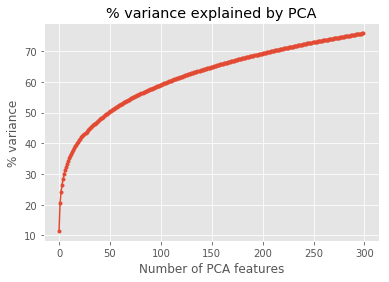

In [10]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1, marker = '.')
plt.xlabel("Number of PCA features")
plt.ylabel("% variance")
plt.title("% variance explained by PCA")
plt.show()

Approx. 300 pca features capture 80% of the variance in the data. We will use thes pca features henceforth for clustering and visualizations

### t-distributed stochastic neighbor embedding (t-SNE)

In [11]:
start_time = time.time()
model = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, 
            learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, 
             min_grad_norm=1e-07, metric='euclidean', init='random', 
             verbose=0, random_state= 123, 
             method='barnes_hut', angle=0.5)
tsne_features = model.fit_transform(df_pca)
end_time = time.time()
print("Time to Run in seconds:  ", end_time-start_time)

Time to Run in seconds:   468.891499042511


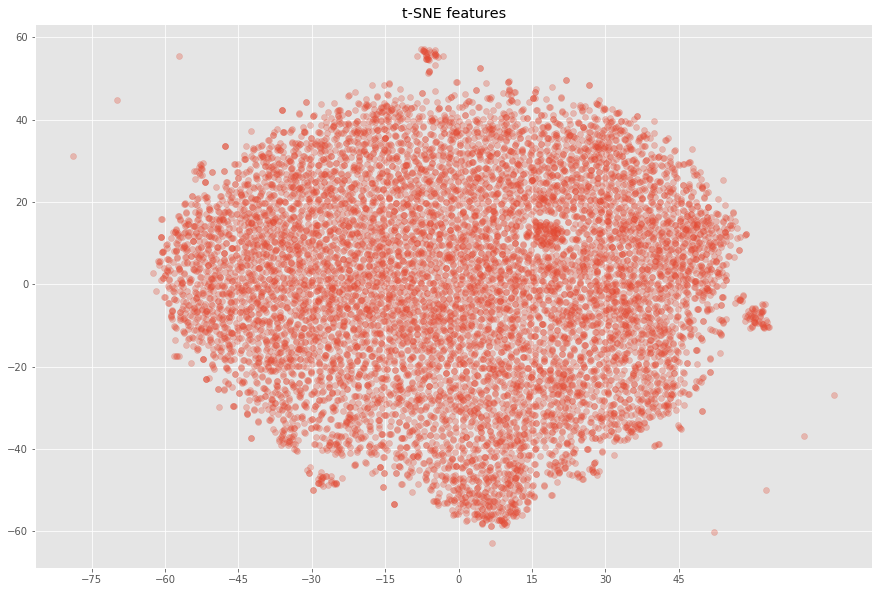

In [12]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys, alpha = 0.3, cmap='viridis')
plt.xticks(np.arange(-75,60,15))
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("t-SNE features")
plt.show()

From the above plot, 2D visualization of our higher dimensional data doesn't show clearly separated clusters. This might indicate that there is no significant difference between any two data points. However, this is not the ultimatum as t-SNE is an algorithm used to visualize higher dimensional data to a 2D or 3D. We will use the 2D features generated by t-SNE to visualize our clustering results from various algorithms

### Clustering

#### K-Means ++

In [13]:
## After PCA, fitting K-Means ++ algorithm for clustering
inertia = []
start_time = time.time()
for i in range(1,20):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

end_time = time.time()
print("Time to Run in seconds:  ", end_time-start_time)

Time to Run in seconds:   112.4187388420105


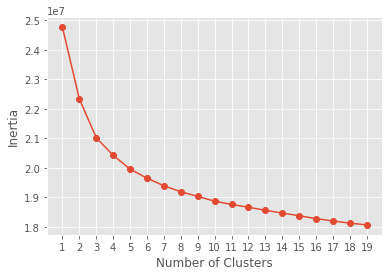

In [14]:
#### Elbow method to idenitfy number of clusters 
plt.plot(range(1,20),inertia,
        marker = 'o')
plt.xlabel('Number of Clusters')
plt.xticks(range(1,20))
plt.ylabel('Inertia')
plt.show()

***We are looking for a sharp bend in the plot of inertia vs number of clusters, where beyond that point change in inertia is very less and that point of bend can be considered as optimal cluster number. In this case, we do not see such sharp bend, however we see that after 3 clusters the variation in inertia is less. Thus, we will fit our data to 3 clusters.***

In [15]:
### K-means ++ with 3 clusters

km = KMeans(n_clusters = 3,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            random_state = 0)


In [16]:
## Labels: Clusters 

labels = km.fit_predict(df_pca)
clusters = list(map(lambda x: x+1, labels))
print("Cluster labels in the data", np.unique(clusters))

Cluster labels in the data [1 2 3]


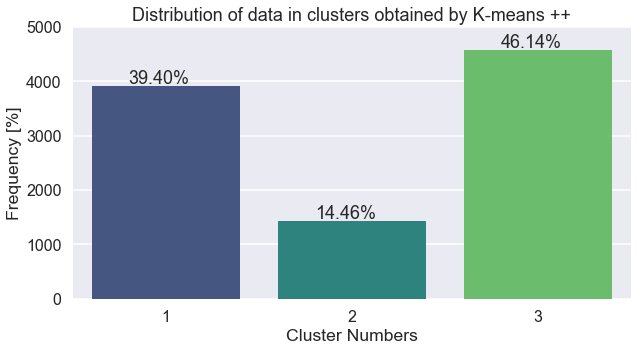

In [28]:
## Distribution of data point in each of these clusters obtained by k-means ++ 

ax = sns.countplot(x = clusters ,palette="viridis")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=5000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(clusters)), (p.get_x()+ 0.2, p.get_height()+ 40))

plt.title('Distribution of data in clusters obtained by K-means ++')
plt.xlabel('Cluster Numbers')
plt.ylabel('Frequency [%]')
plt.show()

***We have higher dimension data, we should use some dimension reduction methods that help visualize our clusters in 2D or 3D. We already employed one such method t-SNE. we use the labels obtained from K-means++ to visualize cluster in a 2D plane***

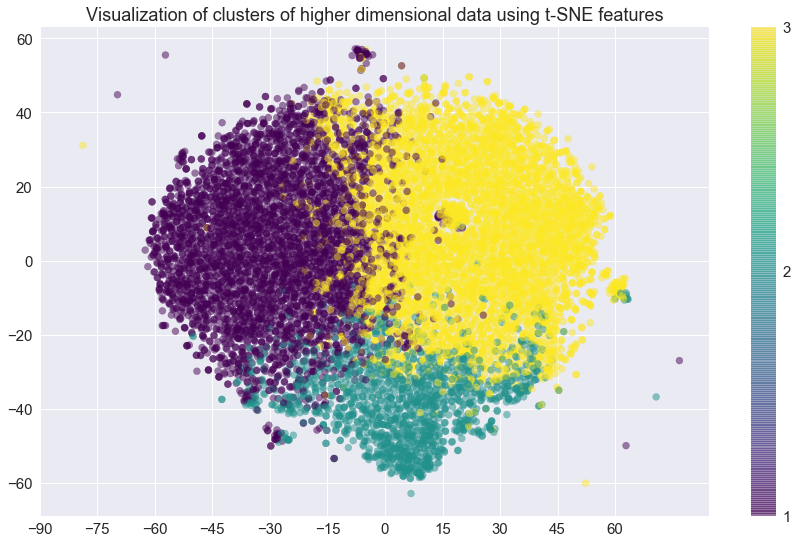

In [18]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys, c = clusters,alpha = 0.5, cmap='viridis')
plt.xticks(np.arange(-90,75,15))
fig = plt.gcf()
plt.colorbar(ticks = range(1,4))
fig.set_size_inches(15,9)
plt.title("Visualization of clusters of higher dimensional data using t-SNE features")
plt.show()

***From the above plot, we see there is overlap between clusters.***

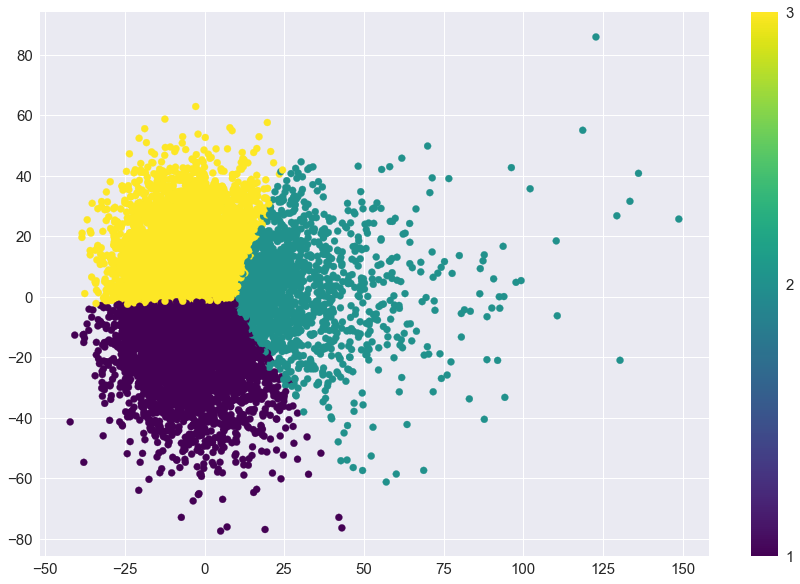

In [19]:
## Visualization of clusters using first two PCA features

plt.scatter(df_pca.iloc[:,1],df_pca.iloc[:,0], c = clusters, cmap='viridis')
plt.colorbar(ticks = range(1,4))
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

***Since, we do not have ground truth labels, we need to use performance metrics where true labels are not required.***  

*In this case, we would use*
1. **Silhouette Coefficient**
2. **Calinski-Harabaz Index**

In [20]:
## Performance 
## Silhouette Coefficient

print("K-means++ clustering performance using Silhouette Coefficient ",
      metrics.silhouette_score(df_pca, clusters, metric='euclidean'))

print("K-means++ clustering performance using Calinski-Harabaz index ",
      metrics.calinski_harabaz_score(df_pca, clusters))

K-means++ clustering performance using Silhouette Coefficient  0.0907435709364
K-means++ clustering performance using Calinski-Harabaz index  884.112604714


***We see that, Sihouette coefficient is around 0 indicating there is overlap between clusters and they are not separated. We will work on choosing the optimal clusters later***

In [21]:
###
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.3, 's' : 80, 'linewidths':0}

In [22]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    clusters = list(map(lambda x: x+1, labels))
    end_time = time.time()
    #f, ax = plt.subplots(2, sharex=True)
    plt.scatter(df_pca.iloc[:,1],df_pca.iloc[:,0], c=clusters, cmap = 'viridis',**plot_kwds)
    frame = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(20,15)
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.text(35, 80, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=20)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    #ax[0].text(9.5, 5.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    #ax[1].scatter(xs,ys, c=clusters,cmap = 'viridis', **plot_kwds)
    if len(np.unique(clusters)) == 1 :
        print("All the data points are in one cluster")
    elif len(np.unique(clusters)) > 3 :
        print("Each data point is a cluster")
    else:
        sil_coef = metrics.silhouette_score(data, clusters, metric='euclidean')
        print("Clustering performance using Silhouette Coefficient ",str(algorithm.__name__),sil_coef)
        return sil_coef

Each data point is a cluster


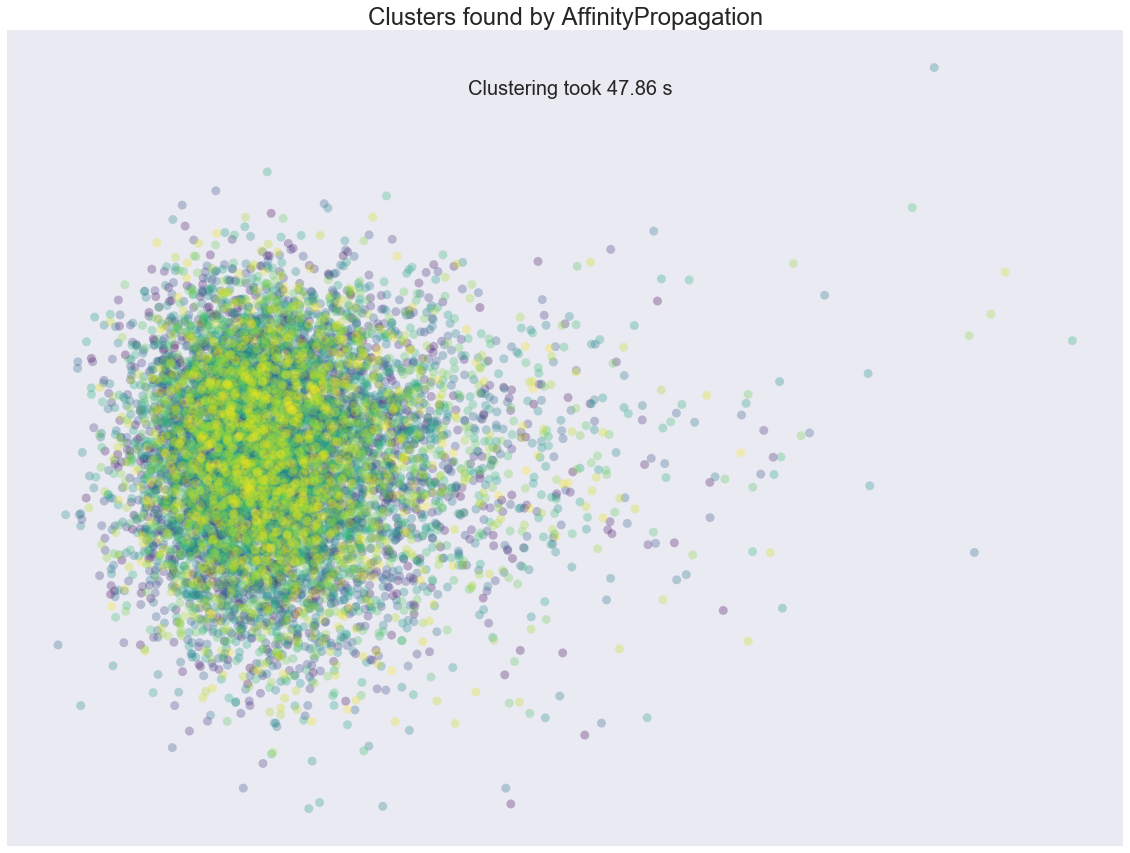

In [23]:
plot_clusters(df_pca, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Clustering performance using Silhouette Coefficient  SpectralClustering -0.010253807702


-0.010253807701991864

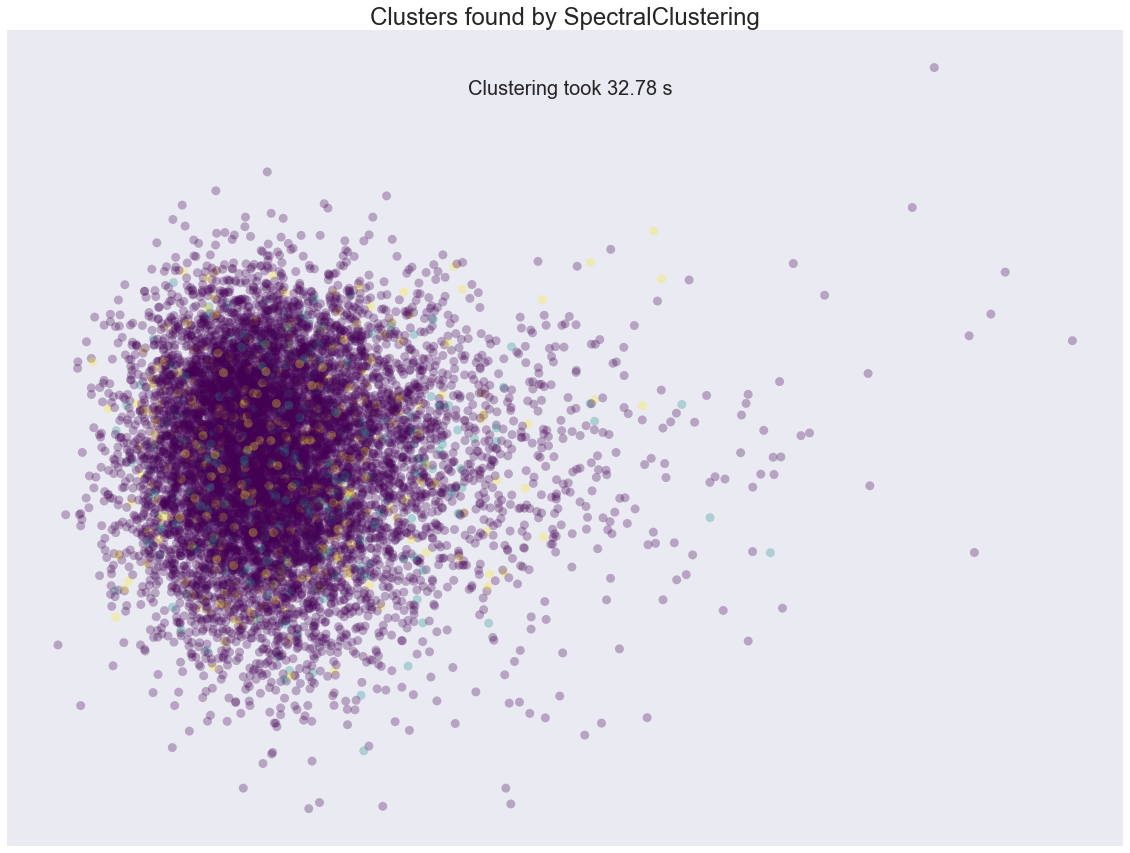

In [24]:
plot_clusters(df_pca, cluster.SpectralClustering, (), {'n_clusters':3})

Clustering performance using Silhouette Coefficient  AgglomerativeClustering 0.0740911659949


0.074091165994850147

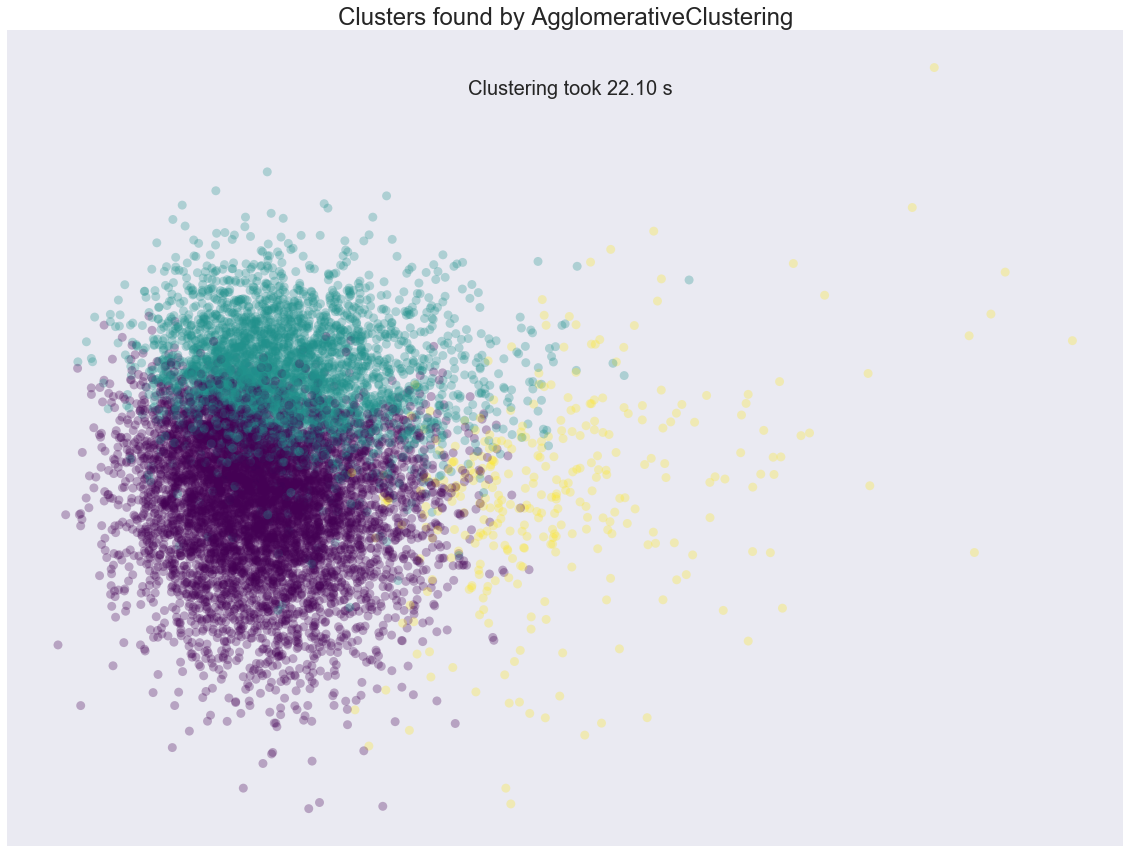

In [25]:
plot_clusters(df_pca, cluster.AgglomerativeClustering, (), {'n_clusters':3, 'linkage':'ward'})

All the data points are in one cluster


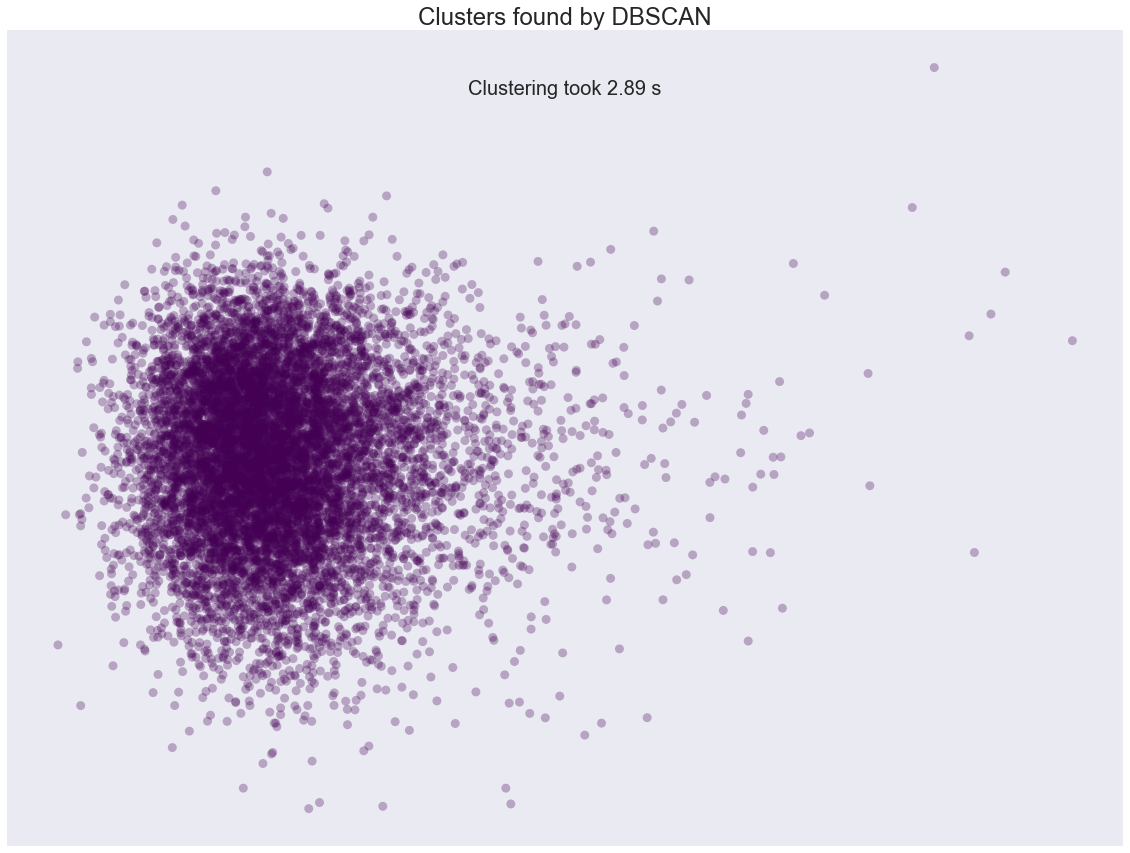

In [26]:
plot_clusters(df_pca, cluster.DBSCAN, (), {'eps':0.025})

All the data points are in one cluster


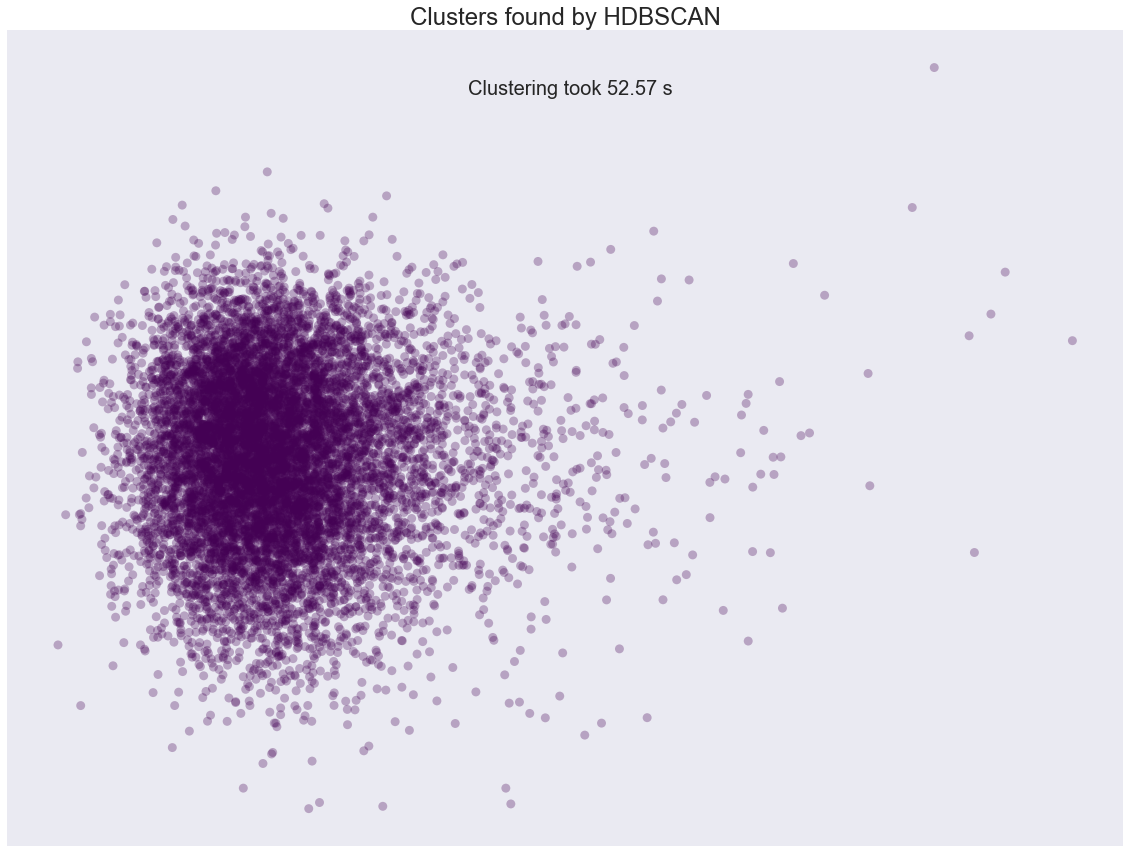

In [27]:
import hdbscan
plot_clusters(df_pca, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

***We saw different clustering algorithms at work. Some algorithms use similarities between points and other are density based like DBSCAN and HDBSCAN. We did not tune the algorithms in this exercise. From performance stand point, K-means++ has highest silohuette coefficient than rest of the algorithms. However, the score obtained is around zero indicating that their is overall between clusters. Thus, we need to employ new techniques to improve silohuette coefficient and there by reducing overlapping between clusters. ***

**Next Steps:**
1. *GridSearch to find best possible parameters for each of the algorithms*
2. *Explore other algorithms or method to achieve good performance*

